In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.regularizers import l2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
npzfile = np.load('/content/drive/MyDrive/ST456_WT2024_data_assign1.npz')

In [5]:
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# the classes correspond to 4 music genres, in this order
classes = ['classical', 'disco', 'metal', 'rock']


In [8]:
# features
x_train = npzfile['x_train']
x_val = npzfile['x_val']
x_test = npzfile['x_test']

# one hot encoded labels
y_train = npzfile['y_train']
y_val = npzfile['y_val']
y_test = npzfile['y_test']

# numerical labels
y_train_num = npzfile['y_train_num']
y_val_num = npzfile['y_val_num']
y_test_num = npzfile['y_test_num']
x_train.shape

(3959, 80, 80, 1)

In [6]:
# Model architecture
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

model = models.Sequential()
#a 2D convolutional layer with 4 channels of squared filters of size 5, padding, default stride, ReLU activation function and default weight and bias initialisations.
model.add(layers.Conv2D(4, (5, 5), activation='relu', padding='same', input_shape=(80,80,1)))

#a 2D max pooling layer with size 2 and stride 2.
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

#a 2D convolutional layer with 8 channels of squared filters of size 5, padding, default stride, ReLU activation function and default weight and bias initialisations.
model.add(layers.Conv2D(8, (5, 5), activation='relu', padding='same'))

#a 2D max pooling layer with size 2 and stride 2.
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

#a 2D convolutional layer with 16 channels of squared filters of size 5, padding, default stride, ReLU activation function and default weight and bias initialisations.
model.add(layers.Conv2D(16, (5, 5), activation='relu', padding='same'))

#a 2D max pooling layer with size 2 and stride 2.
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Flatten())

#a dense layer made of 50 neurons, ReLU activation and L2 regularisation with a penalty of 0.01
model.add(layers.Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 8)         808       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 16)        3216      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

**P1.1**
Conv2D:104 parameters

Conv2D_1: 808 parameters

Conv2D_2: 3216 parameters

Dense: 80050 parameters

Dense_1: 204 parameters

Total: 84382 parameters

Before performing the training, I thought the model may overfitting since there are only 400 songs in the data, which is small. The model can learn very well, including its noise and outliers.

Influcing aspects:
1.Model itself:
Since the layers are assigned, which will influence the model complexity, especially as I mentioned, the limited size of the data.
2.Regularization:
The regularization in the dense layers can help the model to less overfit.
3.Training Epochs:
Too many epochs will lead to overfitting. It needs to stop for validation checks.


In [7]:
model.compile(optimizer='sgd', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train,epochs=20,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/20
124/124 [==============================] - 24s 184ms/step - loss: 2.0292 - accuracy: 0.4971 - val_loss: 2.0783 - val_accuracy: 0.4925
Epoch 2/20
124/124 [==============================] - 20s 163ms/step - loss: 1.6543 - accuracy: 0.6908 - val_loss: 1.6249 - val_accuracy: 0.6858
Epoch 3/20
124/124 [==============================] - 22s 175ms/step - loss: 1.5079 - accuracy: 0.7300 - val_loss: 1.4574 - val_accuracy: 0.7296
Epoch 4/20
124/124 [==============================] - 21s 166ms/step - loss: 1.4307 - accuracy: 0.7487 - val_loss: 1.3984 - val_accuracy: 0.7560
Epoch 5/20
124/124 [==============================] - 21s 174ms/step - loss: 1.3398 - accuracy: 0.7749 - val_loss: 1.3236 - val_accuracy: 0.7756
Epoch 6/20
124/124 [==============================] - 22s 181ms/step - loss: 1.2574 - accuracy: 0.7921 - val_loss: 1.2940 - val_accuracy: 0.7699
Epoch 7/20
124/124 [==============================] - 22s 179ms/step - loss: 1.2096 - accuracy: 0.7969 - val_loss: 1.1932 - val_ac

**P1.2 Plot the loss function and the accuracy per epoch for the train and validation sets.**

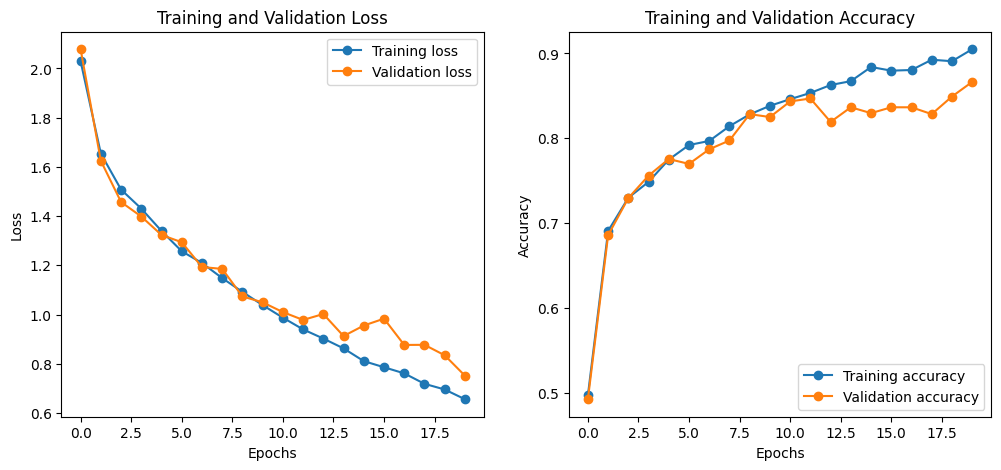

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  #code from sem5


ax1.plot(history.history['loss'], '-o', label='Training loss')
ax1.plot(history.history['val_loss'], '-o', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')


ax2.plot(history.history['accuracy'], '-o', label='Training accuracy')
ax2.plot(history.history['val_accuracy'], '-o', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')


**P1.3Which accuracy do you obtain on the test set?**


In [10]:

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100 * score[1]

print('Test accuracy: %.2f%%' % accuracy)
#code from sem4


Test accuracy: 87.37%


In [16]:
# Plot the confusion matrix of the classification task

# actual: true labels, given as a list of numerical values from 0 to num_classes - 1 (not one-hot encoded)
# predicted: predictions, given as a list of numerical values from 0 to num_classes - 1 (not one-hot encoded)
# labels: list of strings with the name of the classes

def plot_confusion_matrix(actual, predicted, labels):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(8, 8)})
  sns.set(font_scale=1.4)
  ax.set_xlabel('Predicted class')
  ax.set_ylabel('Actual class')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [12]:

y_train_pred = np.argmax(model.predict(x_train), axis=1)
y_test_pred = np.argmax(model.predict(x_test), axis=1)

y_train_actual = np.argmax(y_train, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

37/37 [==============================] - 2s 45ms/step


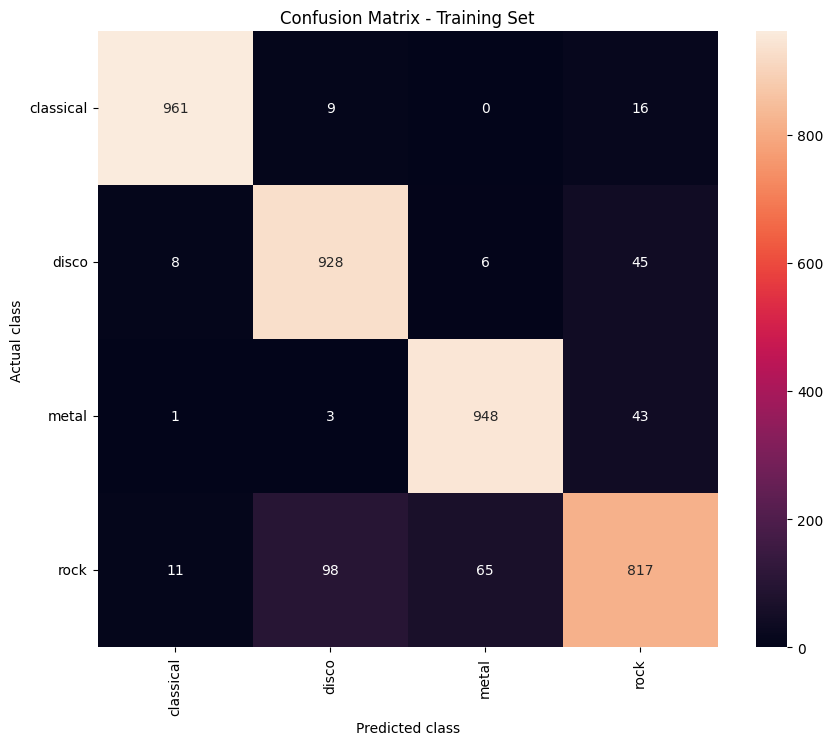

In [13]:
# Plot confusion matrix for the training set
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix - Training Set')
plot_confusion_matrix(y_train_actual, y_train_pred, labels=classes)
plt.show()

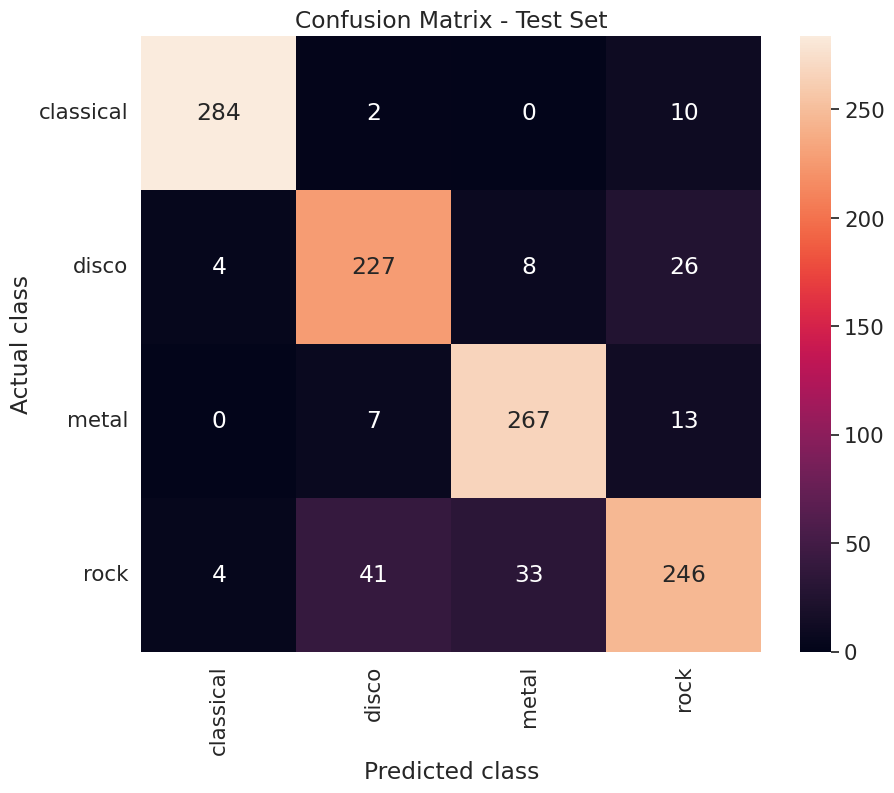

In [14]:
# Plot confusion matrix for the test set
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix - Test Set')
plot_confusion_matrix(y_test_actual, y_test_pred, labels=classes)
plt.show()

**P1.4 What do you observe from this metric? Which classes display more correct predictions? And wrong?**


 Class "classical" has the highest number of correct predictions for Training Set and Test Set.


 The model seems to have difficlut most with distinguishing "rock" from other genres, which may be the reason that several factors are similar.

37/37 [==============================] - 2s 45ms/step


37/37 [==============================] - 2s 46ms/step


In [15]:
# Per class, extract the indexes of correctly and uncorrectly predicted data points

# model: name of the model
# x_train: training data
# ind_class: for which class do you want to observe the wrong predictions? Give it as a numeric value, not a string

def ind_correct_uncorrect(model, x_train, ind_class):
  ind = np.where(np.argmax(y_train, axis=1) == ind_class)[0]
  ind_correct = []
  ind_uncorrect = []
  preds = model.predict(x_train[ind], verbose=0)
  for i in range(len(ind)):
    if np.argmax(preds[i]) == np.argmax(y_train[ind[i]]):
      ind_correct.append(ind[i])
    else:
      ind_uncorrect.append(ind[i])
  return ind_correct, ind_uncorrect

In [16]:
# Per class, plot a given number (i_max * j_max) of spectrograms

# i_max: number of rows of subplots
# j_max: number of columns of subplots
# x_train: training data
# ind_plot: indexes of the data points that you want to plot

def plot_spectrograms(i_max, j_max, x_train, ind_plot):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = ind_plot[i*j_max+j]
      axs[i, j].imshow(x_train[ind])
      axs[i, j].grid(False)
  fig.show()

In [17]:
# Per class, print the predictions of those points that were wrongly classified

# model: name of the model
# x_train: training data
# y_train: training labels, one hot encoded
# ind_wrong: indexes of wrongly predicted points
# ind_class: for which class do you want to observe the wrong predictions? Give it as a numeric value, not a string
# labels: list of strings with the name of the classes

def print_wrong_prediction(model, x_train, y_train, ind_wrong, ind_class, labels):
  print('Wrongly predicted points for true class', labels[ind_class])
  for i in range(len(ind_wrong)):
    preds = model.predict(tf.expand_dims(x_train[ind_wrong[i]], axis=0), verbose=0)
    if np.argmax(preds) != np.argmax(y_train[ind_wrong[i]]):
      print('predicted class is', labels[np.argmax(preds)])

In [18]:
# Compute Grad-CAM heatmap for a given data point and a hidden layer

# imag_array: image (represented as array) on which the heatmap will be produced
# model: name of the model
# layer_name: name of the layer on which the heatmap will be computed

def make_gradcam_heatmap(img_array, model, layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [19]:
# Per class, plot a given number (i_max * j_max) of Grad-CAM heatmaps

# i_max: number of rows of subplots
# j_max: number of columns of subplots
# x_train: training data
# ind: indexes of the wrongly predicted data for that class
# model: name of model
# layer_name: name of layer on which to compute Grad-CAM

def plot_gradcam_spectrogram(i_max, j_max, x_train, ind, model, layer_name):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind_ = ind[i*j_max+j]
      heatmap = make_gradcam_heatmap(tf.expand_dims(x_train[ind_], axis=0), model, layer_name)
      axs[i, j].matshow(heatmap)
      axs[i, j].grid(False)
  fig.show()

NameError: name 'ind_correct' is not defined

**for 'classical'**

Correctly predicted spectrograms for 'classical':
Incorrectly predicted spectrograms for 'classical':


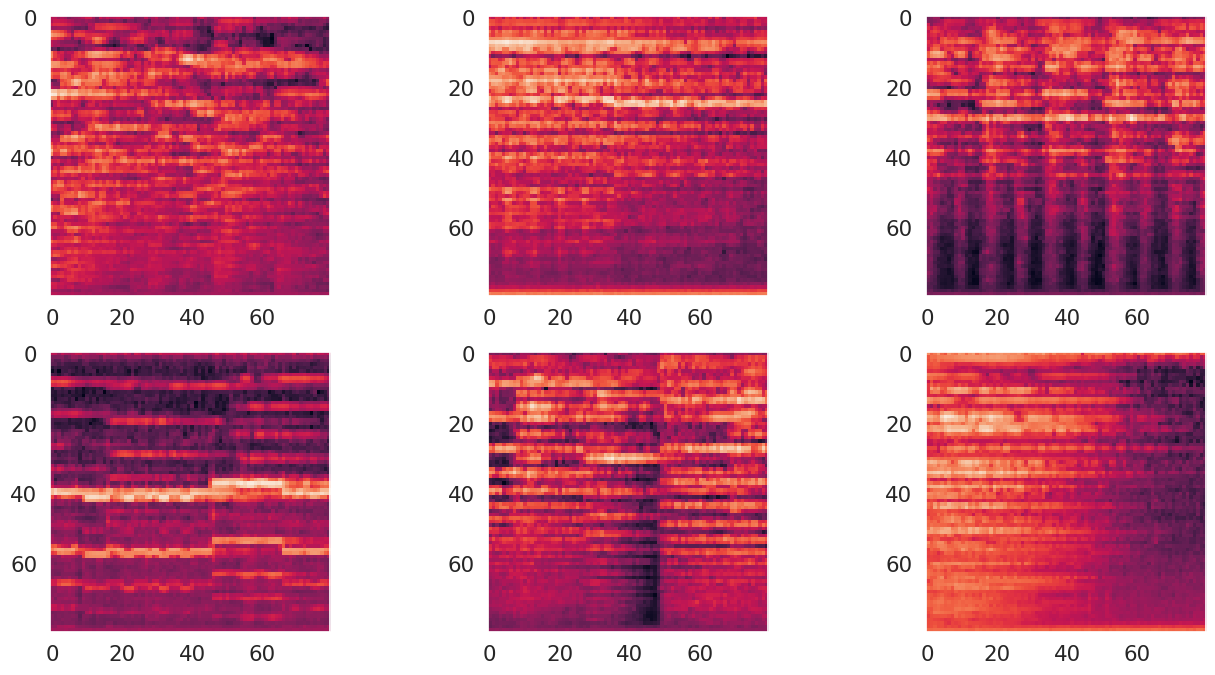

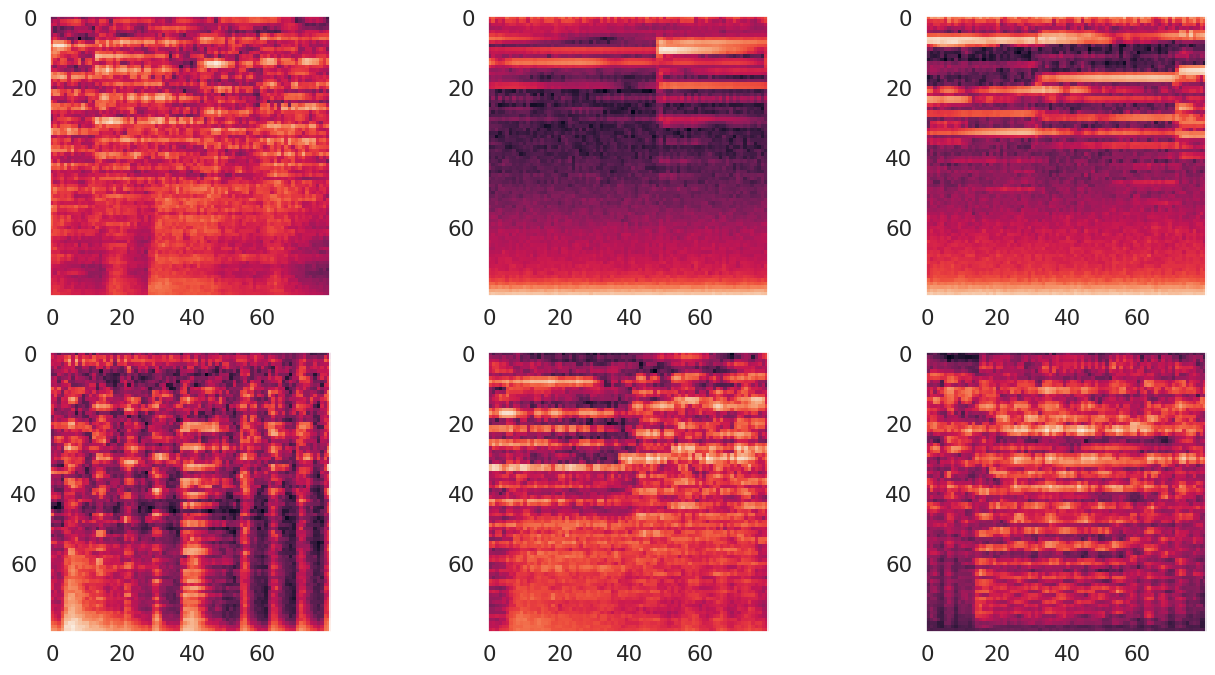

In [20]:

ind_class_c = 0
ind_correct, ind_uncorrect = ind_correct_uncorrect(model, x_train, ind_class_c)

# Correct predictions
print("Correctly predicted spectrograms for 'classical':")
plot_spectrograms(2, 3, x_train, ind_correct[:6])

# Incorrect predictions
print("Incorrectly predicted spectrograms for 'classical':")
plot_spectrograms(2, 3, x_train, ind_uncorrect[:6])
#here, i used chatgpt to help me debug


In [21]:
print_wrong_prediction(model, x_train, y_train, ind_uncorrect[:6], ind_class_c, classes)

Wrongly predicted points for true class classical
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is disco
predicted class is rock
predicted class is disco


In [22]:

selected_correct = ind_correct[:6]
selected_incorrect = ind_uncorrect[:6]
selected_indices = selected_correct + selected_incorrect


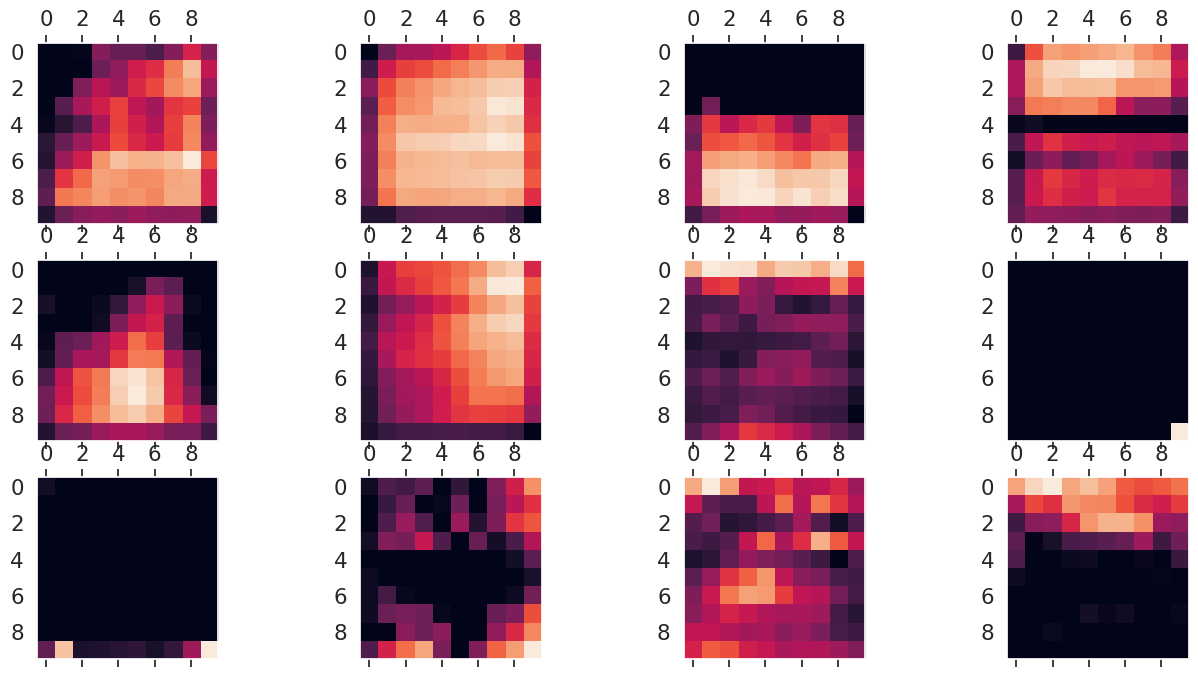

In [23]:
layer_name = 'max_pooling2d_2' # the last pooling layer
i_max = 3
j_max = 4 #10 extracts (6 correct + 6 wrong).

plot_gradcam_spectrogram(i_max, j_max, x_train, selected_indices, model, layer_name)

1

**for 'disco'**

Correctly predicted spectrograms for 'disco':
Incorrectly predicted spectrograms for 'disco':


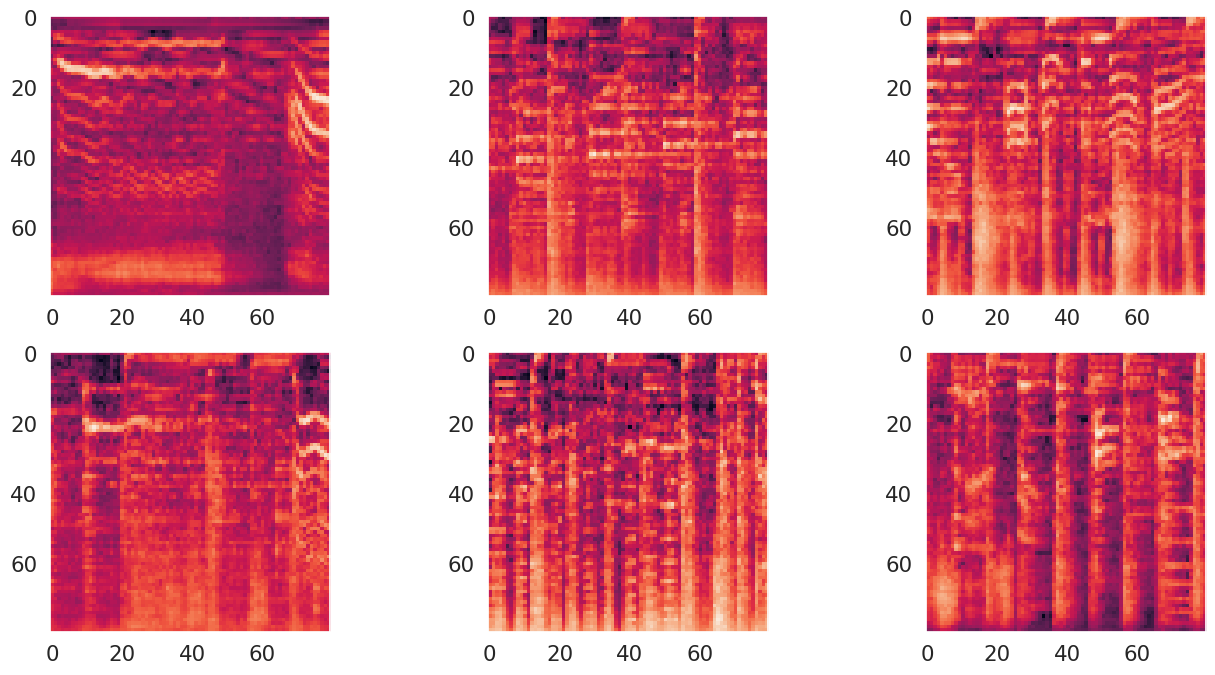

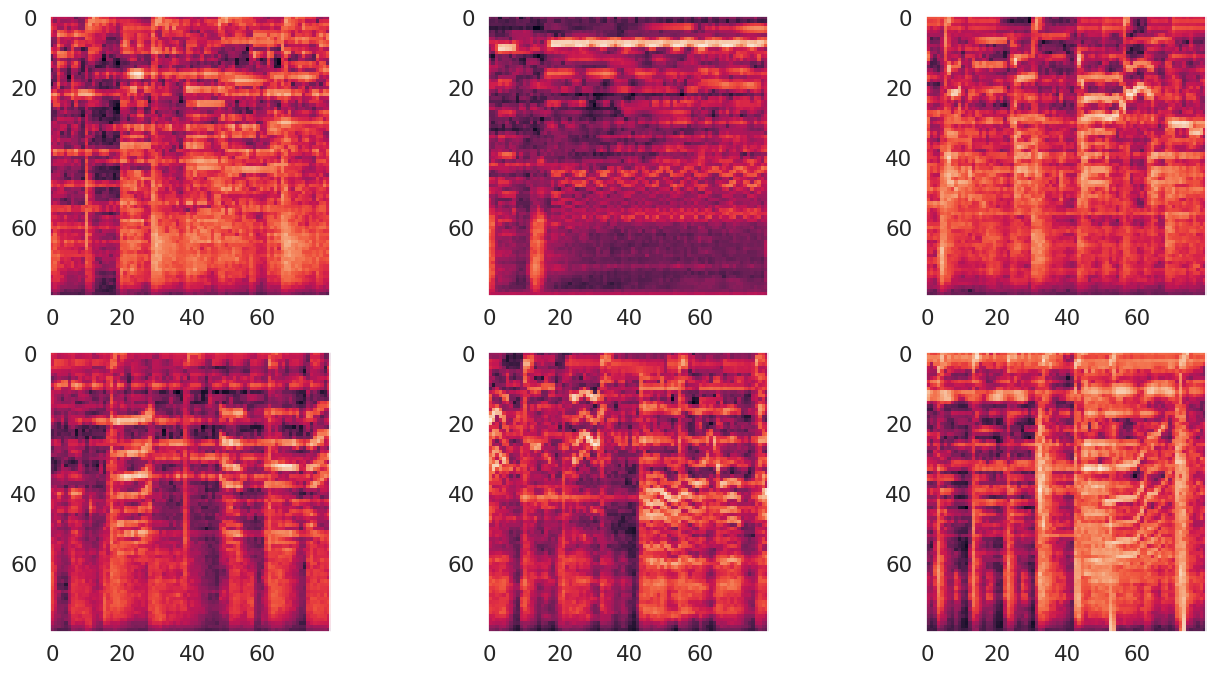

In [24]:
ind_class_disco = 1
ind_correct_disco, ind_uncorrect_disco = ind_correct_uncorrect(model, x_train, ind_class_disco)


# Correct predictions for 'disco'
print("Correctly predicted spectrograms for 'disco':")
plot_spectrograms(2, 3, x_train, ind_correct_disco[:6])

# Incorrect predictions for 'disco'
print("Incorrectly predicted spectrograms for 'disco':")
plot_spectrograms(2, 3, x_train, ind_uncorrect_disco[:6])




In [25]:
print_wrong_prediction(model, x_train, y_train, ind_uncorrect_disco[:6], ind_class_disco, classes)

Wrongly predicted points for true class disco
predicted class is rock
predicted class is rock
predicted class is metal
predicted class is rock
predicted class is rock
predicted class is rock


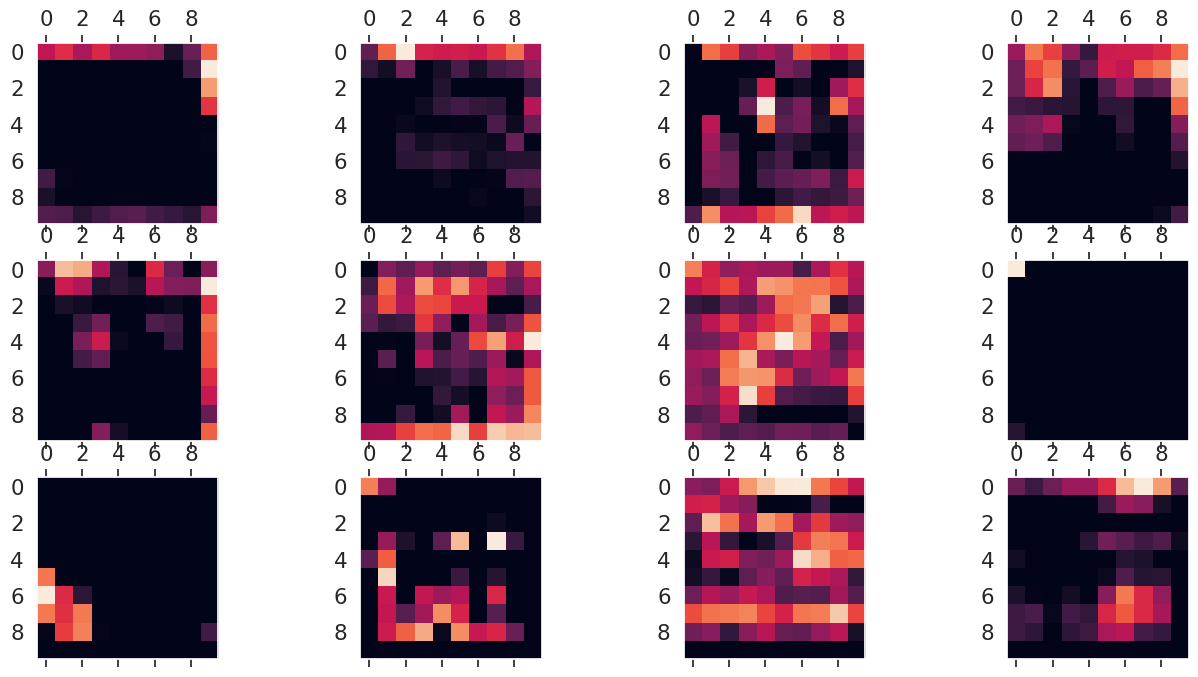

In [26]:

selected_correct_disco = ind_correct_disco[:6]
selected_incorrect_disco = ind_uncorrect_disco[:6]
selected_indices_disco = selected_correct_disco + selected_incorrect_disco

plot_gradcam_spectrogram(3, 4, x_train, selected_indices_disco, model, layer_name)


**for 'mental'**

Correctly predicted spectrograms for 'mental':
Incorrectly predicted spectrograms for 'mental':


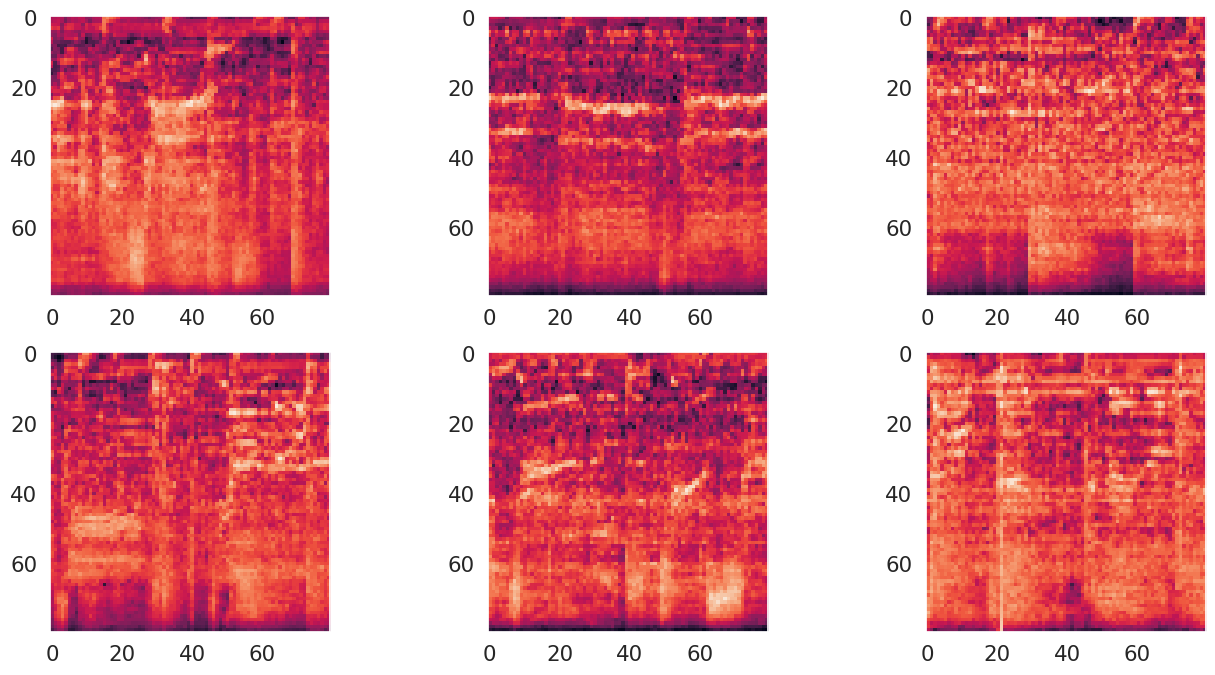

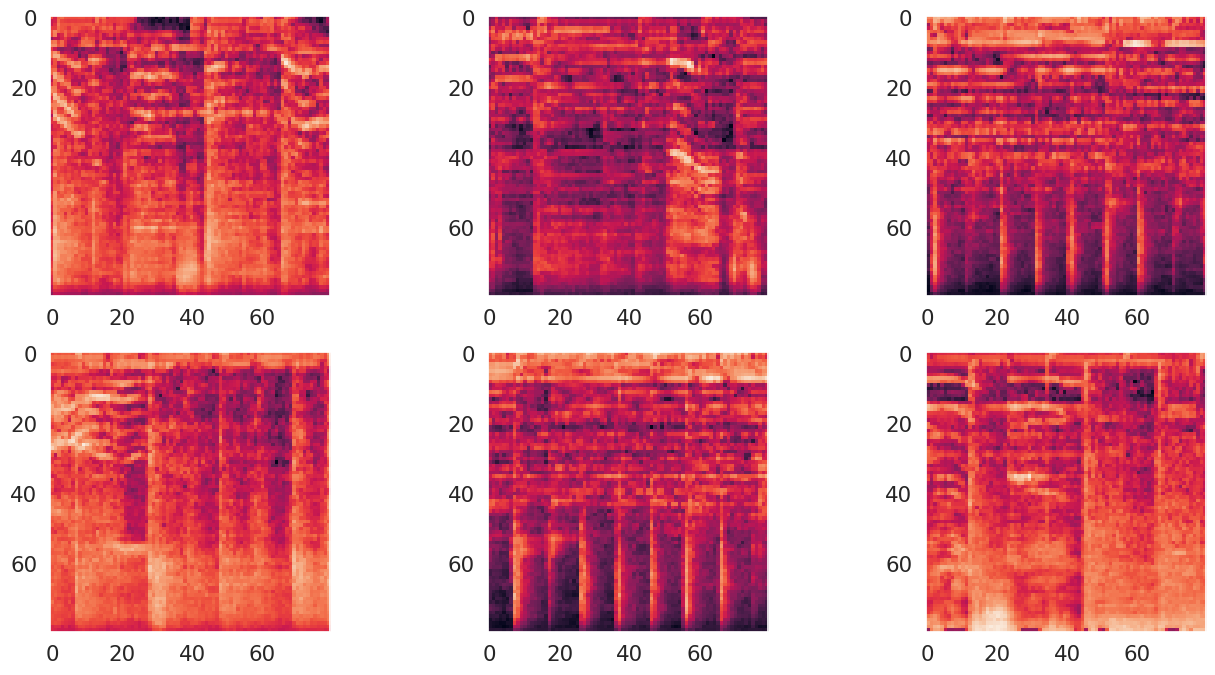

In [27]:
ind_class_mental = 2
ind_correct_mental, ind_uncorrect_mental = ind_correct_uncorrect(model, x_train, ind_class_mental)


# Correct predictions
print("Correctly predicted spectrograms for 'mental':")
plot_spectrograms(2, 3, x_train, ind_correct_mental[:6])

# Incorrect predictions
print("Incorrectly predicted spectrograms for 'mental':")
plot_spectrograms(2, 3, x_train, ind_uncorrect_mental[:6])


In [28]:
print_wrong_prediction(model, x_train, y_train, ind_uncorrect_mental[:6], ind_class_mental, classes)

Wrongly predicted points for true class metal
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is rock
predicted class is rock


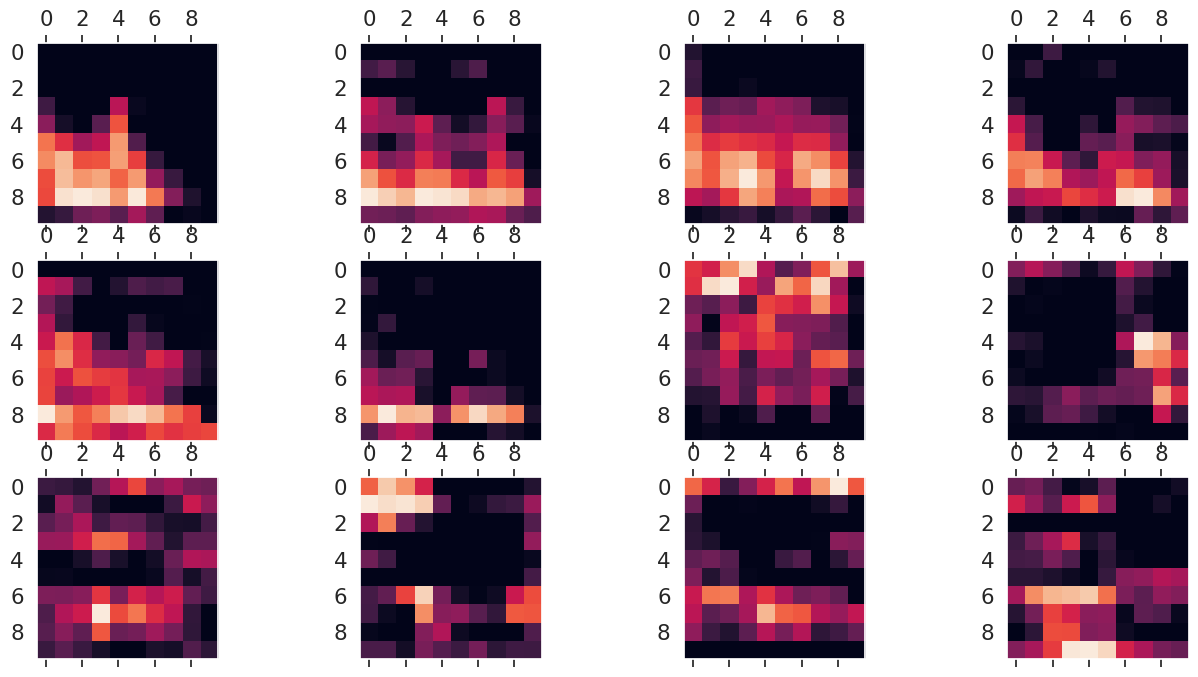

In [29]:
selected_correct_mental = ind_correct_mental[:6]
selected_incorrect_mental = ind_uncorrect_mental[:6]
selected_indices_mental = selected_correct_mental + selected_incorrect_mental
#  plot the Grad-CAM heatmaps
plot_gradcam_spectrogram(3,4, x_train, selected_indices_mental, model, layer_name)


**for 'rock'**

Correctly predicted spectrograms for 'rock':
Incorrectly predicted spectrograms for 'rock':


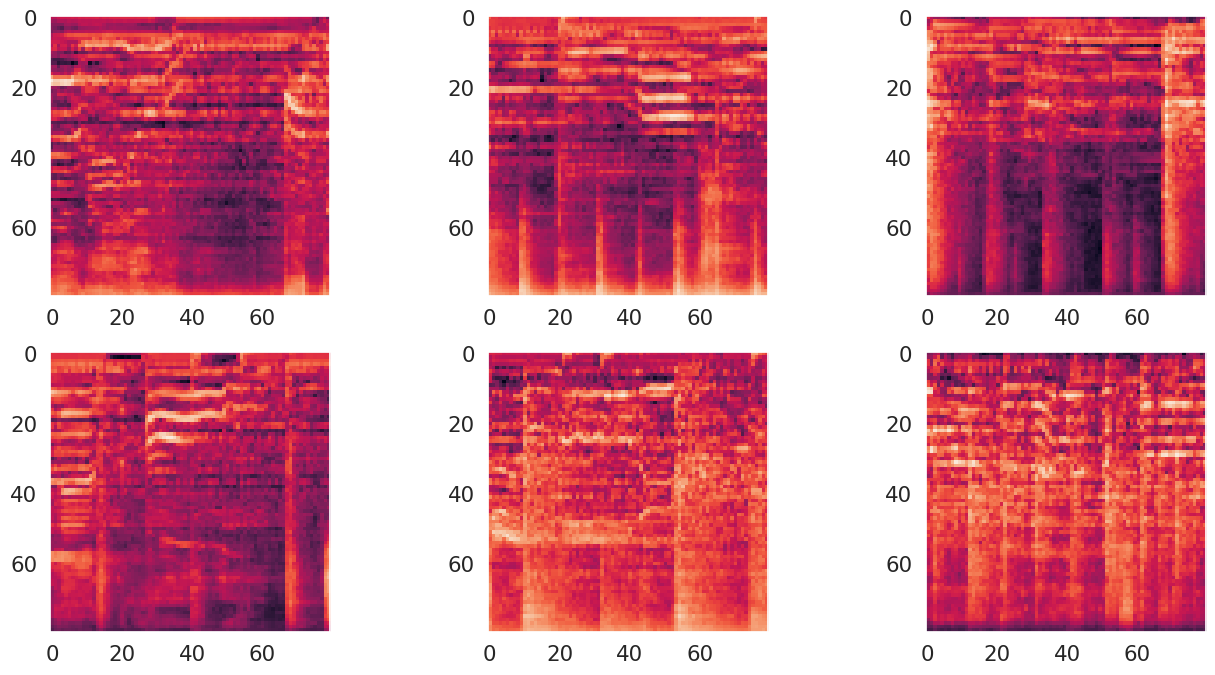

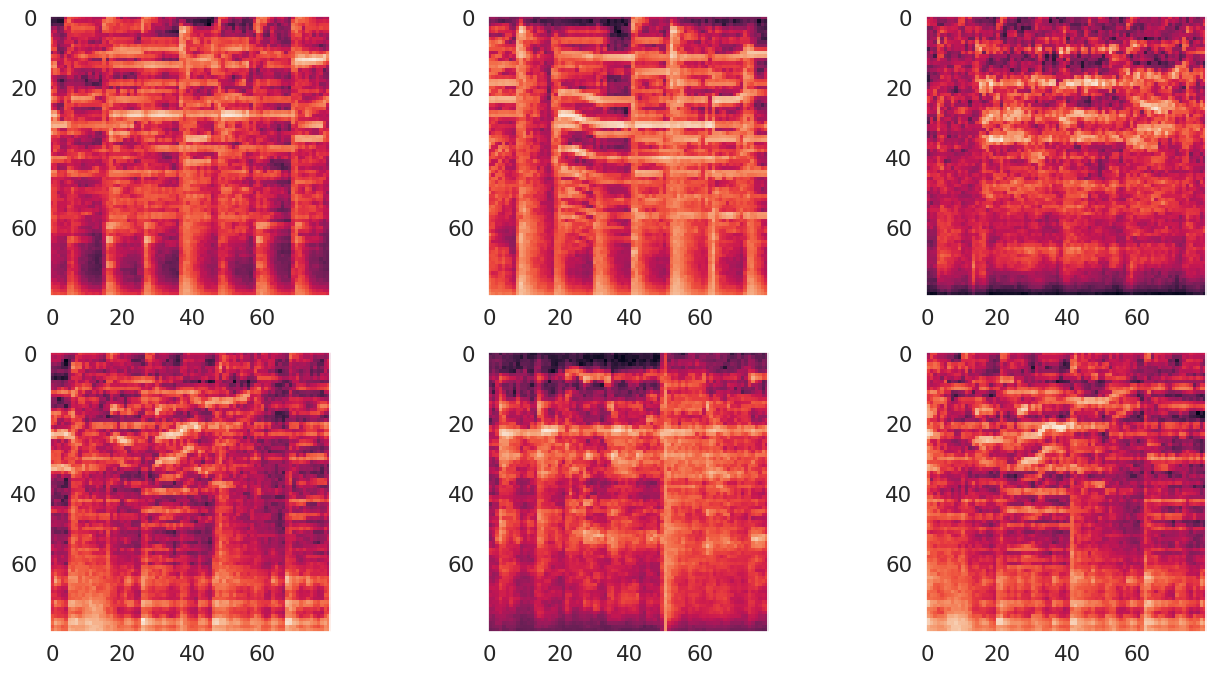

In [30]:
ind_class_rock = 3
ind_correct_rock, ind_uncorrect_rock = ind_correct_uncorrect(model, x_train, ind_class_rock)


# Correct predictions
print("Correctly predicted spectrograms for 'rock':")
plot_spectrograms(2, 3, x_train, ind_correct_rock[:6])

# Incorrect predictions
print("Incorrectly predicted spectrograms for 'rock':")
plot_spectrograms(2, 3, x_train, ind_uncorrect_rock[:6])


In [31]:
print_wrong_prediction(model, x_train, y_train, ind_uncorrect_rock[:6], ind_class_rock, classes)

Wrongly predicted points for true class rock
predicted class is disco
predicted class is disco
predicted class is metal
predicted class is disco
predicted class is disco
predicted class is disco


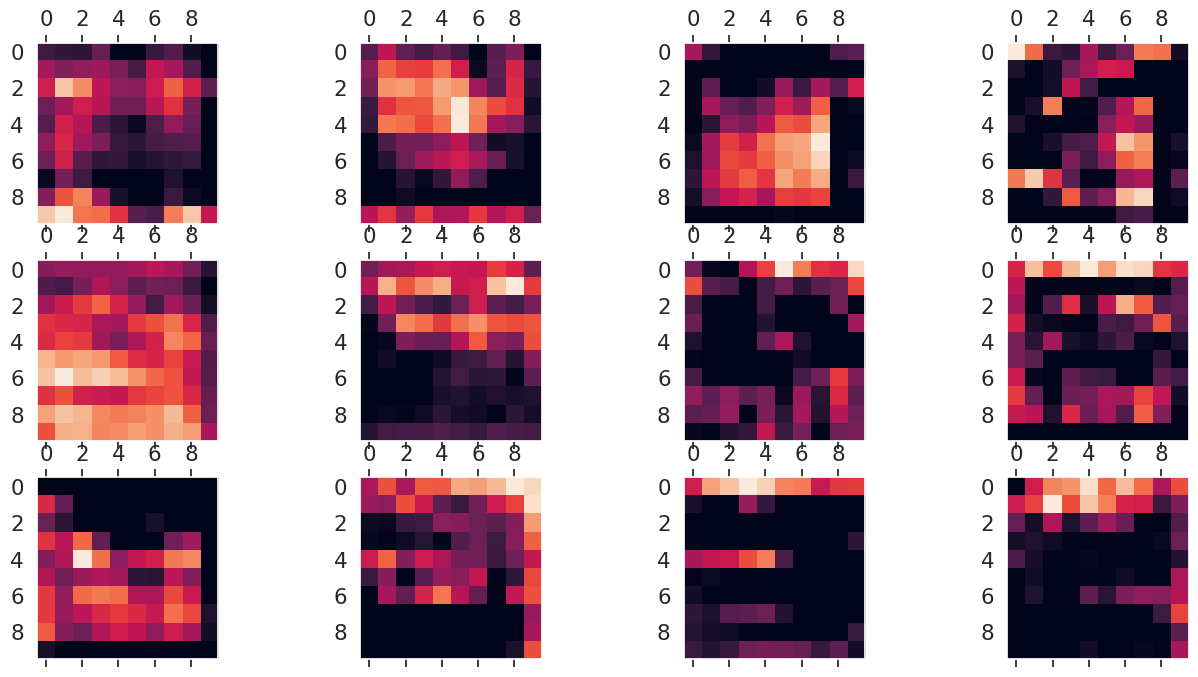

In [32]:
selected_correct_rock = ind_correct_rock[:6]
selected_incorrect_rock = ind_uncorrect_rock[:6]
selected_indices_rock = selected_correct_rock + selected_incorrect_rock
#  plot the Grad-CAM heatmaps
plot_gradcam_spectrogram(3,4, x_train, selected_indices_rock, model, layer_name)

**P1.5 Using the function plot_spectrograms plot the 12 mel spectrograms of the first 6 data points which were predicted correctly and the first 6 which were predicted wrongly. Do you observe some differences among music genres?**

**Classical**:The classical music shows smoother pattern(horizontal axis) and consistent through the frequency spectrum (vertical axis).

**Disco**: There seems to have recurring patterns (horizontal axis), which i think is recurring beats. And it shuows some brightness  on specific frequency bands (vertical axis)which indicates the decibels.

**Mental**: Shows quick and strong changes in the sound pitch as time passes(vertical axis), indicating the music tends to be louder or more complicated.


**Rock,** :It has patterns that repeat over time,and sharp changes.

** Comment on the heatmaps obtained. Do you observe differences among the heatmaps of different music genres? Can you understand why the model got some predictions wrong?
**


**Classical**:Being "lighter and smoother" could indicate a more uniform distribution of certain musical elements, such as tempo, rhythm, or frequency.

**Disco**: It suggests that disco music might have more concentrated features in specific areas. This could be due to the consistent beat, repetitive rhythms, and emphasis on the bass line typical of disco.

**Mental**: Not having a specific pattern could indicate the diversity within these genres.


**Rock,** :Not having a specific pattern could indicate the diversity within these genres. (i used chatgpt for this question)

For wrong predictions, the heatmap might show activations that are not so representative of the genre or are have more characteristics of another genre. This could indicate that the model has learned an incorrect patterns or the spectrograms has ambiguous features which is difficult to distinguish.

**P1.6 Comment on the previous question: what are your thoughts about the applicability of the Grad-CAM tool on these data?**

 Using the plots can help us to understand what features are most indicative of a particular music genre. Hoever its effectiveness can be influenced by some important factors: 1. the nature of audio data. 2. the variability of musical elements, 3. the specific pre-processing steps
 In general, it need much consideration when using Grad-CAM tool.

**P2**

In this part, i tried to separte the time and frequency, then merge them to egther. The rationale are written in the comments
I used chatgpt to help me summarize the model.


In [9]:
from tensorflow.keras import models, layers, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(42)


input_shape = (80, 80, 1)


input_layer = Input(shape=input_shape)

# frequency
# here i use the filters of shape (5, 1), which allows the model to detect patterns specific to the frequency
freq_conv1 = Conv2D(4, (5, 1), activation='relu', padding='same')(input_layer)
freq_pool1 = MaxPooling2D((2, 1))(freq_conv1)
freq_conv2 = Conv2D(8, (5, 1), activation='relu', padding='same')(freq_pool1)
freq_pool2 = MaxPooling2D((2, 1))(freq_conv2)

# time
# here i use the filters of shape (5, 1), which allows the model to detect patterns specific to the time
time_conv1 = Conv2D(4, (1, 5), activation='relu', padding='same')(input_layer)
time_pool1 = MaxPooling2D((1, 2))(time_conv1)
time_conv2 = Conv2D(8, (1, 5), activation='relu', padding='same')(time_pool1)
time_pool2 = MaxPooling2D((1, 2))(time_conv2)
time_pool2_transposed = tf.transpose(time_pool2, perm=[0, 2, 1, 3])

# merge frequency and time together
merged = Concatenate(axis=2)([freq_pool2, time_pool2_transposed])

conv3 = Conv2D(16, (3, 3), activation='relu', padding='same')(merged)
pool3 = MaxPooling2D((2, 2))(conv3)
flat = Flatten()(pool3)

dense = Dense(50, activation='relu', kernel_regularizer=l2(0.01))(flat)

output = Dense(4, activation='softmax')(dense)

model = models.Model(inputs=input_layer, outputs=output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 80, 80, 1)]          0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 80, 80, 4)            24        ['input_2[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 80, 80, 4)            24        ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_7 (MaxPoolin  (None, 80, 40, 4)            0         ['conv2d_7[0][0]']            
 g2D)                                                                                       

The model is designed to capture both the frequency and time characteristics of audio signals encoded in spectrograms. By considering these two dimensions separately at first and then together, the network can more effectively learn the complex patterns that differentiate music genres. This approach aims to improve the model's ability to recognize and classify the genres based on the spectrogram's visual patterns, which represent the audio signal's characteristics.(i used chatgpt here)

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
124/124 [==============================] - 31s 242ms/step - loss: 1.8345 - accuracy: 0.6135 - val_loss: 1.6497 - val_accuracy: 0.7077
Epoch 2/20
124/124 [==============================] - 34s 274ms/step - loss: 1.5793 - accuracy: 0.7216 - val_loss: 1.5798 - val_accuracy: 0.6904
Epoch 3/20
124/124 [==============================] - 29s 232ms/step - loss: 1.4601 - accuracy: 0.7560 - val_loss: 1.4153 - val_accuracy: 0.7699
Epoch 4/20
124/124 [==============================] - 29s 234ms/step - loss: 1.3919 - accuracy: 0.7737 - val_loss: 1.3784 - val_accuracy: 0.7664
Epoch 5/20
124/124 [==============================] - 30s 241ms/step - loss: 1.2798 - accuracy: 0.8070 - val_loss: 1.3240 - val_accuracy: 0.7756
Epoch 6/20
124/124 [==============================] - 32s 259ms/step - loss: 1.1965 - accuracy: 0.8343 - val_loss: 1.2314 - val_accuracy: 0.7975
Epoch 7/20
124/124 [==============================] - 30s 239ms/step - loss: 1.1328 - accuracy: 0.8409 - val_loss: 1.1923 - val_ac

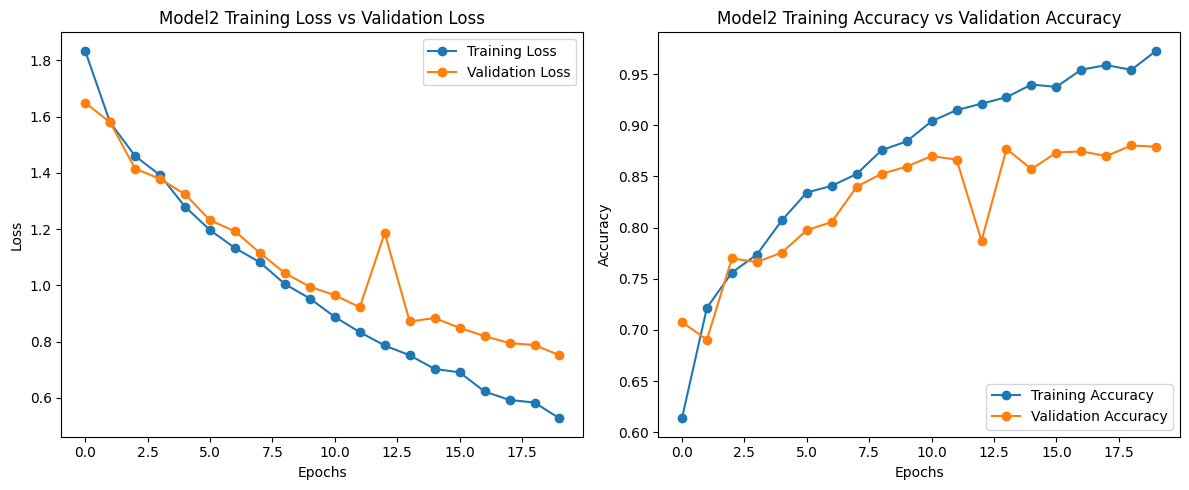

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  #also similar from sem5

# Plotting Training and Validation Loss for Model 2
ax1.plot(history.history['loss'], '-o', label='Training Loss')
ax1.plot(history.history['val_loss'], '-o', label='Validation Loss')
ax1.set_title('Model2 Training Loss vs Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc='upper right')

# Plotting Training and Validation Accuracy for Model 2
ax2.plot(history.history['accuracy'], '-o', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy')
ax2.set_title('Model2 Training Accuracy vs Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100 * score[1]

print('Test accuracy: %.2f%%' % accuracy)
#code from sem4



Test accuracy: 89.25%


In [14]:

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

y_train_pred_num = np.argmax(y_train_pred, axis=1)
y_test_pred_num = np.argmax(y_test_pred, axis=1)


37/37 [==============================] - 3s 74ms/step


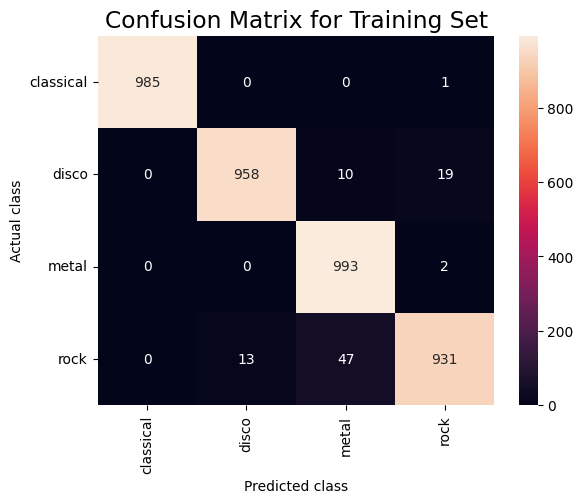

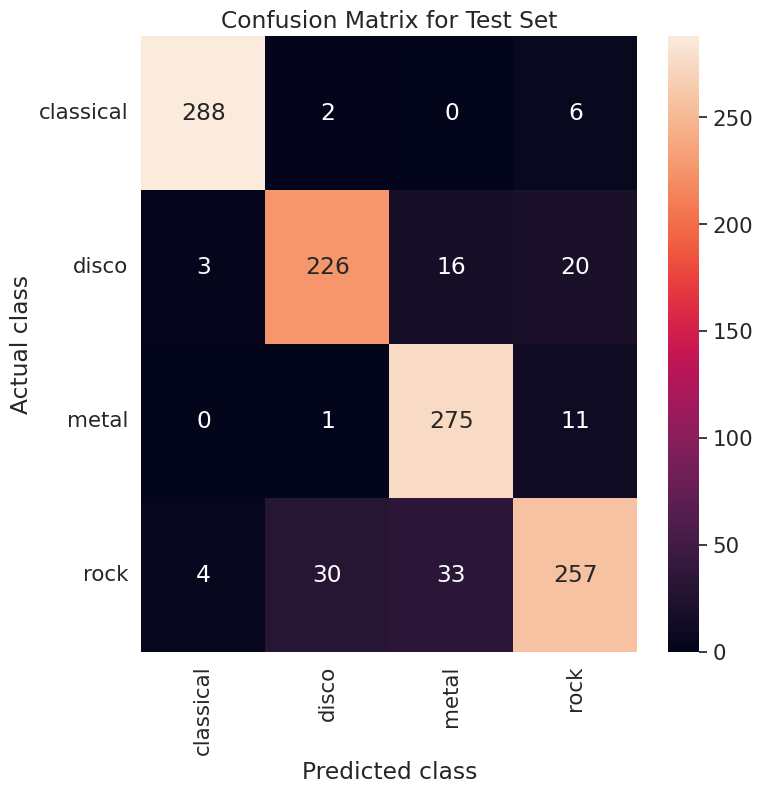

In [17]:
# Plot confusion matrix for the training set
plot_confusion_matrix(y_train_num, y_train_pred_num, classes)
plt.title('Confusion Matrix for Training Set')
plt.show()

# Plot confusion matrix for the test set
plot_confusion_matrix(y_test_num, y_test_pred_num, classes)

plt.title('Confusion Matrix for Test Set')
plt.show()